# Kalman Filter

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm                                                                                                                          
import statsmodels.formula.api as smf                                                                                                                 
import statsmodels.tsa.api as smt
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter

%matplotlib inline

/Users/michaelbeale/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('data/response_times.csv', index_col=0, parse_dates=True)
air = pd.read_csv('data/international-airline-passengers.csv', header=0, index_col=0, parse_dates=[0])

In [4]:
f = df.iloc[:360]
    
f.describe()

,value
count,360.000000
mean,14.245911
std,1.636283
min,11.809258
25%,13.153147
50%,13.928394
75%,14.717499
max,21.017907


In [5]:
def g_h_filter(data, x0, dx, g, h, dt=1.):
    x_est = x0
    results = []
    predictions = []
    residuals = []
    for z in data:
        #prediction step
        x_pred = x_est + (dx*dt)
        dx = dx

        # update step
        residual = z - x_pred
        dx = dx    + h * (residual) / dt
        x_est  = x_pred + g * residual
        predictions.append(x_pred)
        residuals.append(residual)
        results.append(x_est)  
    return (np.array(results), np.array(residuals), np.array(predictions))

In [6]:
data1 = g_h_filter(data=f['value'], x0=14.24, dx=1.64, g=0.8, h=0.1, dt=1.)
data2 = g_h_filter(data=f['value'], x0=14.24, dx=1.64, g=0.4, h=0.1, dt=1.)
data3 = g_h_filter(data=f['value'], x0=14.24, dx=1.64, g=0.4, h=0.1, dt=1.)

#data1 = g_h_filter(data=f['value'], x0=11, dx=1.64, g=0.1, h=0.1, dt=1.)
#data2 = g_h_filter(data=f['value'], x0=11, dx=1.64, g=0.1, h=0.4, dt=1.)
#data3 = g_h_filter(data=f['value'], x0=11, dx=1.64, g=0.1, h=0.8, dt=1.)

NameError: name 'data' is not defined

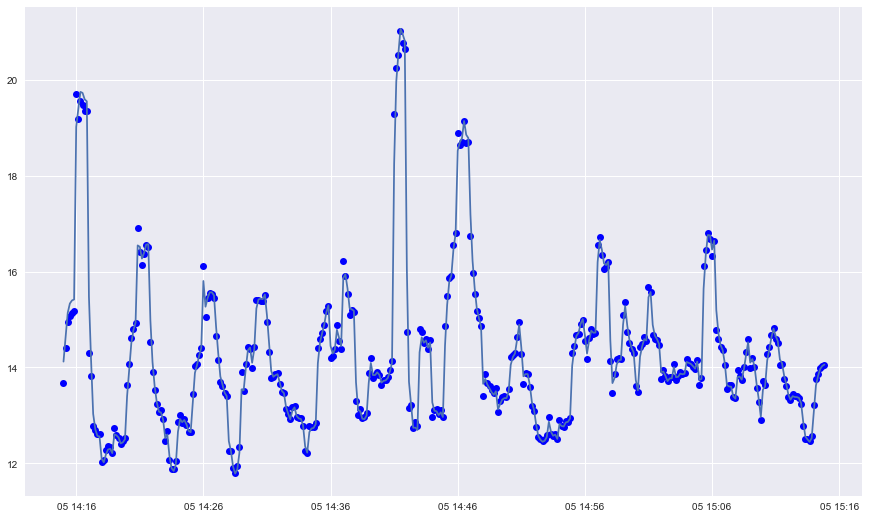

In [7]:
fig = plt.figure(1, figsize=(15, 9))
ax = fig.add_subplot(111)
ax.plot(f.index,f['value'], 'bo', label="original")
ax.plot(f.index, data1[0], label="results")
ax.plot(f.index, data1[0] - data[2], label="results - predictions")
ax.plot(f.index, data1[1], label="residuals")
ax.plot(f.index, data1[2], label="predictions")

#ax.plot(f.index, data1, label="0.1")
#ax.plot(f.index, data2, label="0.4")
#ax.plot(f.index, data3, label="0.8")

#ax.plot(air.index, air['n_pass_thousands'], 'bo', label="original")
#ax.plot(air.index, data3, label="0.8")


ax.legend()

In [9]:
print(data[359:])

NameError: name 'data' is not defined

In [10]:
f.tail()

,value
date,
2017-08-05 15:14:10,13.761402
2017-08-05 15:14:20,13.854600
2017-08-05 15:14:30,13.986293
2017-08-05 15:14:40,14.024720
2017-08-05 15:14:50,14.047113


In [8]:
def update(prior, measurement):
    x, P = prior        # mean and variance of prior
    z, R = measurement  # mean and variance of measurement
    
    y = z - x        # residual
    K = P / (P + R)  # Kalman gain

    x = x + K*y      # posterior
    P = (1 - K) * P    # posterior variance
    return x, P

def predict(posterior, movement):
    x, P = posterior # mean and variance of posterior
    dx, Q = movement # mean and variance of movement
    x = x + dx
    P = P + Q
    return x, P

final estimate:        469.65147442804476
actual final position: n_pass_thousands    432
Name: 1960-12-01 00:00:00, dtype: int64


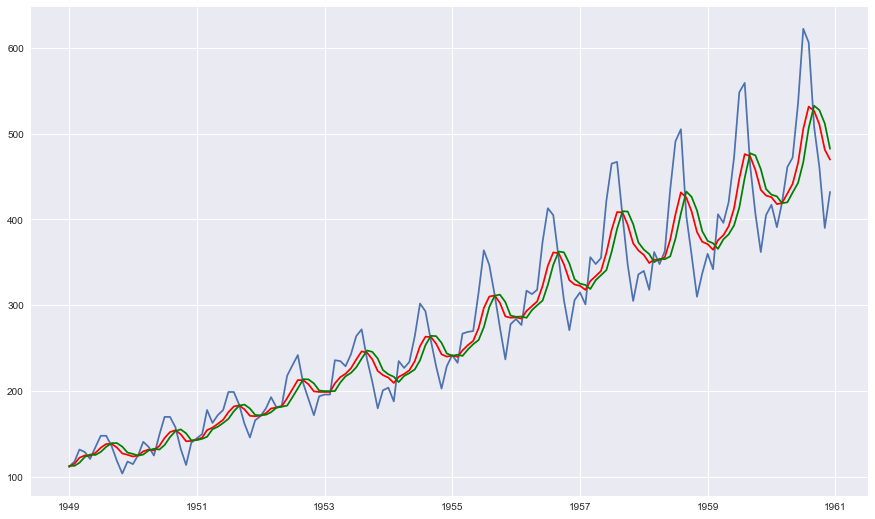

In [80]:
process_var = 10
#sensor_var =  1

sensor_var =  np.std(air['n_pass_thousands'])


x = (air['n_pass_thousands'].iloc[0], (3 * sensor_var) **2)
#x = (600, (3 * sensor_var) **2)
velocity = 1
dt = 1. # time step in seconds
process_model = (velocity*dt, process_var) 

xs, predictions = [], []
for z in air.iterrows():
    # perform Kalman filter on measurement z
    prior = predict(x, process_model)
    likelihood = (z[1]['n_pass_thousands'], sensor_var)
    x = update(prior, likelihood)

    # save results
    predictions.append(prior[0])
    xs.append(x[0])
    #print(x)
    #print("{}\t{}\t{}\t{}\t{}".format(x[0], x[1], z[1], x, likelihood))
    #kf_internal.print_gh(prior, x, z)

#print(xs[:][0])
print('final estimate:        {}'.format(x[0]))
print('actual final position: {}'.format(air.iloc[-1]))
fig = plt.figure(1, figsize=(15, 9))
ax = fig.add_subplot(111)

ax.plot(air['n_pass_thousands'])
ax.plot(air.index, xs, color='red')
ax.plot(air.index, predictions, color='green')



In [79]:
x = [x for x in range(60)]

print(np.std(x)**2)

299.916666667
